In [1]:
import sys, os
sys.path.insert(0, os.path.abspath("../pyCudaPolygon"))
import pyCudaPolygon as pcp
import numpy as np
from matplotlib import pyplot as plt

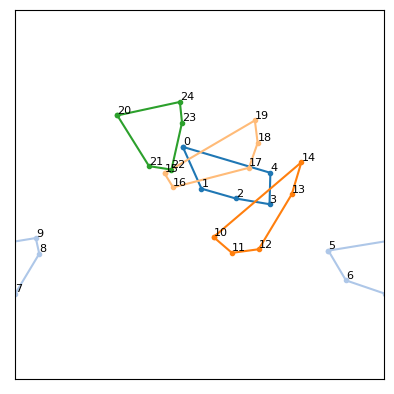

In [2]:
numPolygons = 5
n = 5
m = pcp.model(size = n * numPolygons, seed = 4)
m.setModelEnum("normal")
# Set all polygons to be equally coordinated
m.setECPolygons(n)
# Set random polygon vertices positions
m.setRandomPolygons()
# Make it so that all of the polygons have the same area
m.setMonoArea(phi = 0.1)
m.draw(numbering = True)
plt.show()

In [3]:
# Works fine
m.setMaxEdgeLength()
# use default max edge length by finding it within the simulation
# You can adjust this later.
m.initializeNeighborCells()
m.updateNeighborCells()
m.updateNeighbors(0.05)

In [4]:
players, playerSizes = m.getPlayers()

In [5]:
# Now we have the players and the player sizes. Let's create an array that has playerSizes[-1] elements
intersectionMap = np.zeros(playerSizes[-1], dtype = int)
vertexMap = np.zeros(playerSizes[-1], dtype = int)
for index, player in enumerate(players):
    edge = player[0]
    for i in range(playerSizes[index + 1] - playerSizes[index]):
        intersectionMap[playerSizes[index] + i] = index
        vertexMap[playerSizes[index] + i] = edge
        edge = m.z(edge)

In [12]:
def findPlayerEnergy(g):
    vertex = vertexMap[g]
    player = players[intersectionMap[g]]
    v1 = player[0]
    v2 = player[2]
    
    print(v1, v2, vertex)
    

In [13]:
findPlayerEnergy(5)

4 4 4


In [7]:
m.updateOverlapArea(1000)
intersectionsCounter = m.getIntersectionsCounter()
print(np.sum(intersectionsCounter) / 1e6)
print(m.getOverlapArea())

0.007511
0.007511
